In [21]:
from odapi.connectors import Irceline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
c = Irceline()

2020-06-10 12:39:11,774	odapi             	generic     	load        	DEBUG 	Load Settings C:\Users\jlanderc\Anaconda3\lib\site-packages\odapi-0.1.0-py3.7.egg\odapi\connectors\opendata\resources\irceline.json


In [3]:
s = c.select(measurekey='RH', sitekey='41R')

2020-06-10 12:39:11,808	odapi             	api         	select      	DEBUG 	Selection Keys: {'measurekey': 'RH', 'sitekey': '41R'}
2020-06-10 12:39:13,705	odapi             	irceline    	fetch       	DEBUG 	GET [200]: http://geo.irceline.be/sos/api/v1/timeseries/?expanded=true
2020-06-10 12:39:14,584	odapi             	irceline    	get_metadata	DEBUG 	FRAME: (590, 38) metadata fetched
2020-06-10 12:39:14,616	odapi             	api         	select      	DEBUG 	Selected 2 row(s): {'10794', '10793'}


In [4]:
r = c.get_records(s, start='2017-01-01', stop='2020-01-01')

2020-06-10 12:39:14,662	odapi             	timeseries  	prepare_parameters	DEBUG 	PARAM: {'identifiers': {'10794', '10793'}, 'stop': Timestamp('2020-01-01 00:00:00+0000', tz='UTC'), 'start': Timestamp('2017-01-01 00:00:00+0000', tz='UTC'), 'timerange': DatetimeIndex(['2017-01-01 00:00:00+00:00', '2017-01-02 00:00:00+00:00',
               '2017-01-03 00:00:00+00:00', '2017-01-04 00:00:00+00:00',
               '2017-01-05 00:00:00+00:00', '2017-01-06 00:00:00+00:00',
               '2017-01-07 00:00:00+00:00', '2017-01-08 00:00:00+00:00',
               '2017-01-09 00:00:00+00:00', '2017-01-10 00:00:00+00:00',
               ...
               '2019-12-23 00:00:00+00:00', '2019-12-24 00:00:00+00:00',
               '2019-12-25 00:00:00+00:00', '2019-12-26 00:00:00+00:00',
               '2019-12-27 00:00:00+00:00', '2019-12-28 00:00:00+00:00',
               '2019-12-29 00:00:00+00:00', '2019-12-30 00:00:00+00:00',
               '2019-12-31 00:00:00+00:00', '2020-01-01 00:00:00+00:00'

In [5]:
d = r.merge(s[['serieid', 'seriekey']]).pivot_table(index='start', columns='seriekey', values='value')

In [6]:
d.to_pickle('rh.pickle')

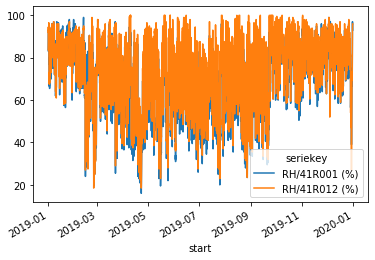

In [7]:
d.plot()

In [12]:
bins = np.arange(0.,101., 10.)

(0, 100)

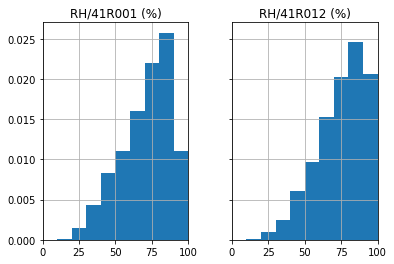

In [40]:
axe = d.hist(density=1, bins=bins, sharex=True, sharey=True)
axe[0][0].set_xlim([0, 100])

(0, 100)

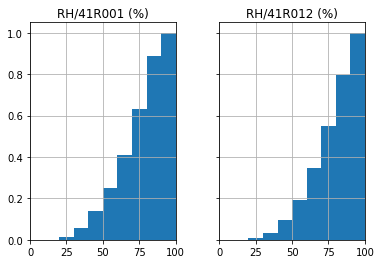

In [42]:
axe = d.hist(density=1, bins=bins, cumulative=True, sharex=True, sharey=True)
axe[0][0].set_xlim([0, 100])